# Imports

In [1]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from pandas.io import sql
import seaborn as sns

In [2]:
#from rasbt/python_reference on git hub for large csv to sqlite

import re
import csv

Create SQLite database

In [3]:
sql_db_name='steam_games_and_reviews.sqllite'
conn= sqlite3.connect(sql_db_name)
c= conn.cursor()

importing CSVs 

In [4]:
steam_reviews_file_path= "C:\\Users\\willv\\Documents\\IOD Mini-project 1\\all_reviews.csv"
steam_game_file_path="steam_games.csv"

cp1252

In [5]:
with open(steam_reviews_file_path, "r",encoding='utf8') as f:
    header= f.readline()
    review_header= list(header.split(","))
    print(header)
    print(f)

recommendationid,appid,game,author_steamid,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,hidden_in_steam_china,steam_china_location

<_io.TextIOWrapper name='C:\\Users\\willv\\Documents\\IOD Mini-project 1\\all_reviews.csv' mode='r' encoding='utf8'>


In [7]:
rowcount=0
with open(steam_reviews_file_path, "r",encoding='utf8') as f:
    for row,l in enumerate(f):
        rowcount+= 1
#printing the result 
print("Number of lines present:-", rowcount)

KeyboardInterrupt: 

In [ ]:
rowcount

In [ ]:
with open(steam_game_file_path, "r",encoding='utf8') as f:
    header= f.readline()
    games_header= list(header.split(";"))
    print(header)
    print(f)

In [ ]:
print(review_header,"\n",len(review_header))
print(games_header,"\n",len(games_header))

In [ ]:
last=review_header[-1]
review_header[-1]=last[:-1]
print(review_header[-1])
last=games_header[-1]
games_header[-1]=last[:-1]
print(games_header[-1])

## Function to import directly from CSV to SQLite
adapted from asbt/python_reference on git hub for large csv to sqlite

In [ ]:
def large_cvs_to_sqlite (csv_path,table_name,table_conn, chunksize,nlines, header_list, index_label,if_exists='append'):
    
    # Iteratively read CSV and dump lines into the SQLite table
    for i in range(1, nlines, chunksize):  # change 0 -> 1 if your csv file contains a column header
    
        df = pd.read_csv(csv_path,  
            header=None,  # no header, define column header manually later
            nrows=chunksize, # number of rows to read at each iteration
            skiprows=i)   # skip rows that were already read
        
        df.columns= header_list
        
        sql.to_sql(df, 
                name=table_name, 
                con=table_conn, 
                index=False, # don't use CSV file index
                index_label=index_label, # use a unique column from DataFrame as index
                if_exists=if_exists) 

In [9]:
games_df=pd.read_csv(steam_game_file_path,on_bad_lines="warn",delimiter=";")

C:\Users\willv\AppData\Local\Temp\ipykernel_16816\1946338694.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  games_df=pd.read_csv(steam_game_file_path,on_bad_lines="warn",delimiter=";")


In [10]:
games_df.head()

,App ID,Name,Short Description,Developer,Publisher,Genre,Tags,Type,Categories,Owners,...,Price,Initial Price,Discount,CCU,Languages,Platforms,Release Date,Required Age,Website,Header Image
0,10,Counter-Strike,Play the world's number 1 online action game. ...,Valve,Valve,Action,"Action: 5426, FPS: 4831, Multiplayer: 3392, Sh...",game,"Multi-player, Valve Anti-Cheat enabled, Online...","10,000,000 .. 20,000,000",...,999,999,0,13990,"English, French, German, Italian, Spanish - Sp...","windows, mac, linux",2000/11/1,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
1,1000000,ASCENXION,ASCENXION is a 2D shoot 'em up game where you ...,IndigoBlue Game Studio,PsychoFlux Entertainment,"Action, Adventure, Indie","""Shoot Em Up"": 186, Metroidvania: 181, Bullet ...",game,"Single-player, Partial Controller Support, Ste...","0 .. 20,000",...,999,999,0,0,"English, Korean, Simplified Chinese",windows,2021/05/14,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
2,1000010,Crown Trick,"Enter a labyrinth that moves as you move, wher...",NEXT Studios,"Team17, NEXT Studios","Adventure, Indie, RPG, Strategy","Rogue-like: 268, Turn-Based Combat: 254, RPG: ...",game,"Single-player, Partial Controller Support, Ste...","200,000 .. 500,000",...,599,1999,70,99,"Simplified Chinese, English, Japanese, Traditi...",windows,2020/10/16,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
3,1000030,"Cook, Serve, Delicious! 3?!","Cook, serve and manage your food truck as you ...",Vertigo Gaming Inc.,Vertigo Gaming Inc.,"Action, Indie, Simulation, Strategy","Typing: 221, Management: 213, Casual: 209, Dif...",game,"Multi-player, Single-player, Co-op, Steam Achi...","100,000 .. 200,000",...,1999,1999,0,76,English,"windows, mac",2020/10/14,0,http://www.cookservedelicious.com,https://cdn.akamai.steamstatic.com/steam/apps/...
4,1000040,细胞战争,这是一款打击感十足的细胞主题游戏！操作简单但活下去却不简单，“你”作为侵入人体的细菌病毒，通...,DoubleC Games,DoubleC Games,"Action, Casual, Indie, Simulation","Action: 22, Casual: 22, Indie: 21, Simulation: 20",game,Single-player,"0 .. 20,000",...,199,199,0,0,Simplified Chinese,windows,2019/03/30,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...


In [ ]:
#c.execute('DROP TABLE steam_reviews')
conn.commit()

In [ ]:
large_cvs_to_sqlite(steam_reviews_file_path,table_name= 'steam_reviews',table_conn=conn,chunksize=100000,nlines=rowcount,header_list=review_header,
                   index_label='recommendationid', if_exists='append')

In [11]:
c.execute('''
SELECT *
FROM steam_reviews
LIMIT 10
''')
c.fetchall()

[(148919893,
  10,
  'Counter-Strike',
  76561199036724879,
  0,
  3,
  197,
  197,
  197,
  1698336369,
  'russian',
  'старость',
  1698336397,
  1698336397,
  1,
  0,
  0,
  0.0,
  0,
  1,
  0,
  0,
  1,
  None),
 (148919350,
  10,
  'Counter-Strike',
  76561198826729322,
  0,
  21,
  441,
  37,
  441,
  1698335809,
  'russian',
  'Лучше кс 2',
  1698335821,
  1698335821,
  1,
  0,
  0,
  0.0,
  0,
  1,
  0,
  0,
  1,
  None),
 (148913051,
  10,
  'Counter-Strike',
  76561199101237625,
  7,
  1,
  1440,
  1440,
  1313,
  1698338635,
  'turkish',
  'çoh iyi ama pahalı',
  1698329862,
  1698329862,
  1,
  0,
  0,
  0.0,
  0,
  1,
  0,
  0,
  1,
  None),
 (148912714,
  10,
  'Counter-Strike',
  76561198347582422,
  11,
  4,
  1636,
  83,
  1612,
  1698341834,
  'russian',
  'топ',
  1698329555,
  1698329555,
  1,
  0,
  0,
  0.0,
  0,
  1,
  0,
  0,
  1,
  None),
 (148912575,
  10,
  'Counter-Strike',
  76561198363716821,
  0,
  2,
  197,
  41,
  197,
  1698329401,
  'english',
  'GOAT

# EDA based on games data only

In [ ]:
games_df.to_sql(name='steam_games2022',con= conn, if_exists='replace', index=False)

In [12]:
games_df.dtypes

App ID                int64
Name                 object
Short Description    object
Developer            object
Publisher            object
Genre                object
Tags                 object
Type                 object
Categories           object
Owners               object
Positive Reviews      int64
Negative Reviews      int64
Price                 int64
Initial Price         int64
Discount              int64
CCU                   int64
Languages            object
Platforms            object
Release Date         object
Required Age         object
Website              object
Header Image         object
dtype: object

In [17]:
games_df.Genre.convert_dtypes()

0                                     Action
1                   Action, Adventure, Indie
2            Adventure, Indie, RPG, Strategy
3        Action, Indie, Simulation, Strategy
4          Action, Casual, Indie, Simulation
                        ...                 
55686                              Education
55687               Adventure, Casual, Indie
55688                   Animation & Modeling
55689     Indie, RPG, Strategy, Early Access
55690                  Action, Casual, Indie
Name: Genre, Length: 55691, dtype: string

In [15]:
games_df.Tags.convert_dtypes()

0        Action: 5426, FPS: 4831, Multiplayer: 3392, Sh...
1        "Shoot Em Up": 186, Metroidvania: 181, Bullet ...
2        Rogue-like: 268, Turn-Based Combat: 254, RPG: ...
3        Typing: 221, Management: 213, Casual: 209, Dif...
4        Action: 22, Casual: 22, Indie: 21, Simulation: 20
                               ...                        
55686                       Education: 22, VR: 6, Space: 5
55687                 Casual: 21, Indie: 21, Adventure: 20
55688                     Animation & Modeling: 25, 3D: 13
55689    Early Access: 21, Indie: 20, RPG: 20, Strategy...
55690    Action: 42, Casual: 41, Indie: 41, Platformer:...
Name: Tags, Length: 55691, dtype: string

In [18]:
games_df.isnull().sum()

App ID                   0
Name                     0
Short Description       37
Developer              130
Publisher              173
Genre                  161
Tags                   135
Type                     0
Categories             970
Owners                   0
Positive Reviews         0
Negative Reviews         0
Price                    0
Initial Price            0
Discount                 0
CCU                      0
Languages               11
Platforms                0
Release Date            99
Required Age             0
Website              25217
Header Image             0
dtype: int64

In [19]:
games_df.dropna(subset=['Genre','Tags'],inplace=True)

In [20]:
sqltables_query = """SELECT name FROM sqlite_master  
  WHERE type='table';"""

In [22]:
games_df['Genre'].str.contains('%col%').any()

False

In [23]:
c.execute(sqltables_query)
c.fetchall()

[('steam_reviews',),
 ('steam_games.csv',),
 ('steam_games2022',),
 ('colonySim_games2022',),
 ('colonySim_games2022_reviews',)]

In [ ]:
#attempt to drop table made from steam_games.csv without a proper name
c.execute('DROP TABLE "FILE"')
conn.commit()

In [24]:
c.execute('''
SELECT *
FROM steam_games2022
LIMIT 10
''')
c.fetchall()

[(10,
  'Counter-Strike',
  "Play the world's number 1 online action game. Engage in an incredibly realistic brand of terrorist warfare in this wildly popular team-based game. Ally with teammates to complete strategic missions. Take out enemy sites. Rescue hostages. Your role affects your team's success. Your team's success affects your role.",
  'Valve',
  'Valve',
  'Action',
  'Action: 5426, FPS: 4831, Multiplayer: 3392, Shooter: 3353, Classic: 2784, Team-Based: 1864, First-Person: 1707, Competitive: 1607, Tactical: 1344, e-sports: 1192, "1990s": 1191, PvP: 881, Old School: 769, Military: 632, Strategy: 614, Survival: 304, Score Attack: 289, 1980s: 266, Assassin: 227, Nostalgia: 131',
  'game',
  'Multi-player, Valve Anti-Cheat enabled, Online PvP, Shared/Split Screen PvP, PvP',
  '10,000,000 .. 20,000,000',
  201215,
  5199,
  999,
  999,
  0,
  13990,
  'English, French, German, Italian, Spanish - Spain, Simplified Chinese, Traditional Chinese, Korean',
  'windows, mac, linux',
  

In [ ]:
c.execute('''
SELECT Name,Genre,Tags
FROM steam_games2022
WHERE LOWER(Tags) like '%colony%'
''')
c.fetchall()

In [25]:
c.execute('''
SELECT COUNT(Tags) as num_colonySims
FROM steam_games2022
WHERE LOWER(Tags) like '%colony%'
''')
c.fetchall()

[(385,)]

In [ ]:
c.execute('''
CREATE TABLE colonySim_games2022 AS
SELECT *
FROM steam_games2022
WHERE LOWER(Tags) like '%colony%'
''')
c.fetchall()

In [26]:
c.execute(sqltables_query)
c.fetchall()

[('steam_reviews',),
 ('steam_games.csv',),
 ('steam_games2022',),
 ('colonySim_games2022',),
 ('colonySim_games2022_reviews',)]

# Combining the reviews and colony sim games table into a new table
## to not have to join and call on the entire review table

In [ ]:
c.execute('''
CREATE TABLE colonySim_games2022_reviews AS
SELECT *
FROM colonySim_games2022
INNER JOIN steam_reviews
ON colonySim_games2022.[App ID]=steam_reviews.appid
''')
c.fetchall()

## Getting Schema of my tables

In [6]:
sqlschema_query = "SELECT * FROM sqlite_master WHERE type='table';"

In [7]:
c.execute(sqlschema_query)
c.fetchall()

[('table',
  'steam_reviews',
  'steam_reviews',
  2,
  'CREATE TABLE "steam_reviews" (\n"recommendationid" INTEGER,\n  "appid" INTEGER,\n  "game" TEXT,\n  "author_steamid" INTEGER,\n  "author_num_games_owned" INTEGER,\n  "author_num_reviews" INTEGER,\n  "author_playtime_forever" INTEGER,\n  "author_playtime_last_two_weeks" INTEGER,\n  "author_playtime_at_review" INTEGER,\n  "author_last_played" INTEGER,\n  "language" TEXT,\n  "review" TEXT,\n  "timestamp_created" INTEGER,\n  "timestamp_updated" INTEGER,\n  "voted_up" INTEGER,\n  "votes_up" INTEGER,\n  "votes_funny" INTEGER,\n  "weighted_vote_score" REAL,\n  "comment_count" INTEGER,\n  "steam_purchase" INTEGER,\n  "received_for_free" INTEGER,\n  "written_during_early_access" INTEGER,\n  "hidden_in_steam_china" INTEGER,\n  "steam_china_location" REAL\n)'),
 ('table',
  'steam_games.csv',
  'steam_games.csv',
  5720356,
  'CREATE TABLE "steam_games.csv" (\n"App ID" INTEGER,\n  "Name" TEXT,\n  "Short Description" TEXT,\n  "Developer" TEXT

## From here, we confirm the table colonySim_games2022_reviews has columns for if reviews are positive or negative, weighted votes score for how useful each review is. 

In [37]:
c.execute('''
SELECT COUNT([App ID])
FROM colonySim_games2022_reviews

''')
c.fetchall()

[(807218,)]

# Getting the unique tags present in all the colsim games to investigate trends

In [8]:
#Start with making a data frame from the smaller table
colonySims2022= pd.read_sql_query("SELECT * from colonySim_games2022",con=conn)
colonySims2022.head()

,App ID,Name,Short Description,Developer,Publisher,Genre,Tags,Type,Categories,Owners,...,Price,Initial Price,Discount,CCU,Languages,Platforms,Release Date,Required Age,Website,Header Image
0,1012610,Buoyancy,Buoyancy is a city-building strategy game wher...,Devs on a Boat,Devs on a Boat,"Indie, Strategy, Early Access","Colony Sim: 47, Strategy: 37, Indie: 36, Early...",game,"Single-player, Steam Cloud","20,000 .. 50,000",...,1299,1299,0,8,"English, French, Spanish - Spain, German, Dutc...","windows, mac, linux",2019/08/30,0,https://buoyancygame.com,https://cdn.akamai.steamstatic.com/steam/apps/...
1,1022980,Ostranauts,Ostranauts is a detailed simulation of owning ...,Blue Bottle Games,Modern Wolf,"Indie, RPG, Simulation, Early Access","Early Access: 267, Immersive Sim: 242, Space: ...",game,Single-player,"50,000 .. 100,000",...,1999,1999,0,14,English,windows,2020/09/10,0,https://bluebottlegames.com/games/ostranauts,https://cdn.akamai.steamstatic.com/steam/apps/...
2,1028730,Creo God Simulator,"Creo God Simulator is a game of city building,...",MKSM Design LLC,MKSM Design LLC,"Casual, Free to Play, Indie, Simulation, Strat...","God Game: 155, City Builder: 148, Indie: 146, ...",game,Single-player,"0 .. 20,000",...,0,0,0,1,"English, Spanish - Spain, Spanish - Latin America",windows,2019/03/2,0,https://www.creogodsimulator.com/,https://cdn.akamai.steamstatic.com/steam/apps/...
3,1029780,Going Medieval,Stake your claim in this colony building sim a...,Foxy Voxel,The Irregular Corporation,"Indie, RPG, Simulation, Strategy, Early Access","Early Access: 401, City Builder: 364, Medieval...",game,"Single-player, Steam Achievements, Steam Cloud","500,000 .. 1,000,000",...,2499,2499,0,1126,"English, Simplified Chinese, French, German, J...",windows,2021/06/1,0,https://theirregularcorporation.com/promo/goin...,https://cdn.akamai.steamstatic.com/steam/apps/...
4,1031270,Farming Life,Are you tired of corporate life? Create your o...,▲ Pyramid Games,"Gaming Factory, Ultimate Games S.A.","Adventure, Casual, Indie, Simulation","Simulation: 191, Farming Sim: 185, Indie: 182,...",game,"Single-player, Steam Achievements, Steam Cloud","0 .. 20,000",...,999,999,0,0,"English, French, Italian, German, Spanish - Sp...",windows,2021/10/18,0,http://farminglife.pyramid.games/,https://cdn.akamai.steamstatic.com/steam/apps/...


## Define a function to make the tags into more readable lists and get rid of unneeded info

In [11]:
def tag_cleaner(tag_string):
    game_tags_list=re.split(',',tag_string)
    for i in range(0,len(game_tags_list)):
        game_tags_list[i]=game_tags_list[i].strip()
        game_tags_list[i]=re.sub( r'[0-9]','',game_tags_list[i])
        game_tags_list[i]=game_tags_list[i].strip(': ')
    return game_tags_list

In [9]:
#What the tags look like raw from the data set
colonySims2022.Tags[0]

'Colony Sim: 47, Strategy: 37, Indie: 36, Early Access: 35, City Builder: 33, Base-Building: 26, Survival: 22, Post-apocalyptic: 18, Resource Management: 16, Open World: 14, Simulation: 14, RTS: 13, Singleplayer: 13, Dark Humor: 12, Pirates: 12, Gore: 10, Great Soundtrack: 10, Rogue-like: 9, Romance: 8'

In [12]:
#test/after cleaning
tag_cleaner(colonySims2022.Tags[0])

['Colony Sim',
 'Strategy',
 'Indie',
 'Early Access',
 'City Builder',
 'Base-Building',
 'Survival',
 'Post-apocalyptic',
 'Resource Management',
 'Open World',
 'Simulation',
 'RTS',
 'Singleplayer',
 'Dark Humor',
 'Pirates',
 'Gore',
 'Great Soundtrack',
 'Rogue-like',
 'Romance']

In [13]:
#looping through the whole data set and adding new tags to a seperate list
unique_tags_colsim=[]
for game_tags in colonySims2022.Tags:
    tag_list= tag_cleaner(game_tags)
    for tag in tag_list:
        if tag not in unique_tags_colsim:
            unique_tags_colsim.append(tag)

In [14]:
print(len(unique_tags_colsim))
unique_tags_colsim.sort()
unique_tags_colsim

311


['"Beat em up"',
 '"Shoot Em Up"',
 '"s"',
 '.D',
 'ATV',
 'Abstract',
 'Action',
 'Action RPG',
 'Action RTS',
 'Action Roguelike',
 'Action-Adventure',
 'Addictive',
 'Adventure',
 'Agriculture',
 'Aliens',
 'Alternate History',
 'America',
 'Animation & Modeling',
 'Anime',
 'Arcade',
 'Arena Shooter',
 'Artificial Intelligence',
 'Assassin',
 'Asynchronous Multiplayer',
 'Atmospheric',
 'Auto Battler',
 'Automation',
 'Automobile Sim',
 'BMX',
 'Base-Building',
 'Baseball',
 'Basketball',
 'Battle Royale',
 'Beautiful',
 'Bikes',
 'Board Game',
 'Boxing',
 'Building',
 'Bullet Hell',
 'CRPG',
 'Capitalism',
 'Card Battler',
 'Card Game',
 'Cartoon',
 'Cartoony',
 'Casual',
 'Cats',
 'Character Customization',
 'Choices Matter',
 'Choose Your Own Adventure',
 'Cinematic',
 'City Builder',
 'Classic',
 'Clicker',
 'Co-op',
 'Cold War',
 'Collectathon',
 'Colony Sim',
 'Colorful',
 'Combat',
 'Combat Racing',
 'Comedy',
 'Comic Book',
 'Competitive',
 'Controller',
 'Conversation',
 '

In [16]:
query_most_reviewed='''
SELECT Name,
       COUNT([App ID]) AS rev_count,
       [Positive Reviews],
       [Negative Reviews],
       Tags
FROM colonySim_games2022_reviews
GROUP BY [App ID]
ORDER BY COUNT([App ID]) DESC
LIMIT 10
'''

In [156]:
c.execute(query_most_reviewed)
#c.fetchall()

In [57]:
top10_reviewed=pd.read_sql_query(query_most_reviewed,con=conn)
top10_reviewed.set_index('Name',inplace=True)
top10_reviewed

,rev_count,Positive Reviews,Negative Reviews,Tags
Name,,,,
RimWorld,169176,142201,2550,"Colony Sim: 3375, Base-Building: 3296, Surviva..."
Frostpunk,95303,76558,7020,"City Builder: 1520, Survival: 1488, Strategy: ..."
Prison Architect,66689,57563,6155,"Simulation: 1861, Building: 1761, Sandbox: 170..."
Cult of the Lamb,59055,29893,2387,"Character Customization: 570, Cute: 507, Actio..."
SPORE,54402,43290,3731,"God Game: 1399, Open World: 1380, Exploration:..."
Banished,40255,35024,3804,"City Builder: 3656, Colony Sim: 3383, Strategy..."
Medieval Dynasty,32498,25348,2605,"Survival: 659, Building: 572, Open World: 556,..."
WorldBox - God Simulator,27683,14152,872,"Early Access: 489, God Game: 444, Sandbox: 430..."
Timberborn,20252,13968,834,"Early Access: 564, City Builder: 512, Colony S..."


<Axes: xlabel='Game Name', ylabel='Number of Reviews'>

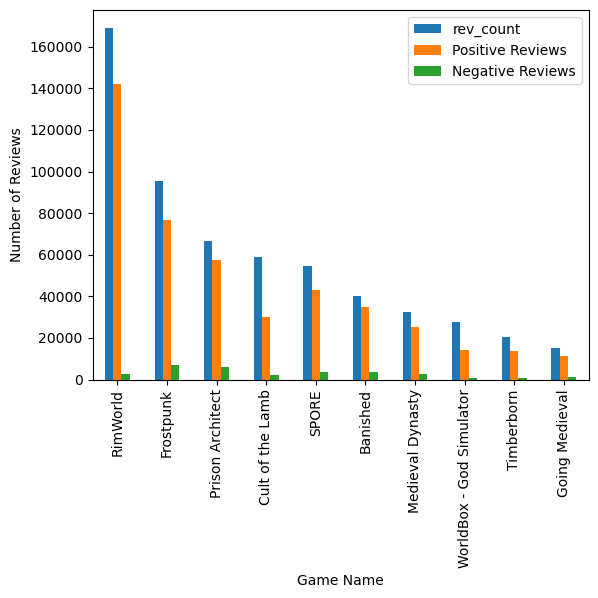

In [59]:
top10_reviewed.plot.bar(xlabel= 'Game Name', ylabel='Number of Reviews')

In [18]:
query_most_reviewed_indie='''
SELECT Name,
       COUNT([App ID]) AS rev_count,
       [Positive Reviews],
       [Negative Reviews],
       Tags
FROM colonySim_games2022_reviews
WHERE Tags LIKE "%Indie%"
GROUP BY [App ID]
ORDER BY COUNT([App ID]) DESC
LIMIT 10
'''

In [153]:
c.execute(query_most_reviewed_indie)
#c.fetchall()

In [55]:
top10_reviewed_indie=pd.read_sql_query(query_most_reviewed_indie,con=conn)
top10_reviewed_indie.set_index('Name',inplace=True)
top10_reviewed_indie

,rev_count,Positive Reviews,Negative Reviews,Tags
Name,,,,
RimWorld,169176,142201,2550,"Colony Sim: 3375, Base-Building: 3296, Surviva..."
Prison Architect,66689,57563,6155,"Simulation: 1861, Building: 1761, Sandbox: 170..."
Banished,40255,35024,3804,"City Builder: 3656, Colony Sim: 3383, Strategy..."
WorldBox - God Simulator,27683,14152,872,"Early Access: 489, God Game: 444, Sandbox: 430..."
ISLANDERS,15047,13597,693,"Relaxing: 225, City Builder: 196, Strategy: 17..."
Craft The World,13994,11556,1535,"Sandbox: 634, Crafting: 584, Colony Sim: 494, ..."
Stonehearth,11964,8634,2687,"Colony Sim: 695, City Builder: 670, Building: ..."
Necesse,9302,3657,202,"Open World Survival Craft: 292, Sandbox: 281, ..."
Castle Story,9014,5152,3149,"Colony Sim: 388, Strategy: 378, Building: 363,..."


<Axes: xlabel='Game Name', ylabel='Number of Reviews'>

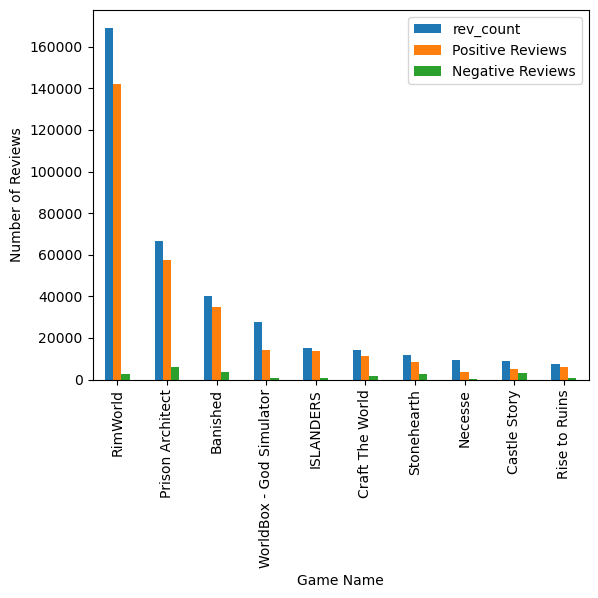

In [56]:
top10_reviewed_indie.plot.bar(xlabel= 'Game Name', ylabel='Number of Reviews')

In [20]:
query_most_pos_reviewed='''
SELECT Name,
       COUNT([App ID]) AS rev_count,
       [Positive Reviews],
       [Negative Reviews],
       ([Positive Reviews]-[Negative Reviews])*100/COUNT([App ID]) AS approval_rating,
       Tags
FROM colonySim_games2022_reviews
WHERE [Positive Reviews] >50
GROUP BY [App ID]
ORDER BY approval_rating DESC
LIMIT 10
'''

In [154]:
c.execute(query_most_pos_reviewed)
#c.fetchall()

In [53]:
top10_positive=pd.read_sql_query(query_most_pos_reviewed,con=conn)
top10_positive.set_index('Name',inplace=True)
top10_positive

,rev_count,Positive Reviews,Negative Reviews,approval_rating,Tags
Name,,,,,
ISLANDERS,15047,13597,693,85,"Relaxing: 225, City Builder: 196, Strategy: 17..."
RimWorld,169176,142201,2550,82,"Colony Sim: 3375, Base-Building: 3296, Surviva..."
The Last Haven,1341,1389,313,80,"Early Access: 90, Strategy: 81, Base-Building:..."
Exodus Borealis,230,194,14,78,"Strategy: 97, Building: 90, Tower Defense: 90,..."
Farlanders: Prologue,264,220,15,77,"Base-Building: 316, Colony Sim: 311, Mars: 307..."
Banished,40255,35024,3804,77,"City Builder: 3656, Colony Sim: 3383, Strategy..."
Prison Architect,66689,57563,6155,77,"Simulation: 1861, Building: 1761, Sandbox: 170..."
Startopia,889,774,90,76,"Simulation: 177, Management: 159, Strategy: 15..."
Rise to Ruins,7409,6210,774,73,"Tower Defense: 296, Colony Sim: 285, City Buil..."


<Axes: title={'center': 'Top 10 Highest Game Approval Rating'}, xlabel='Game Name', ylabel='Approval Rating (in %)'>

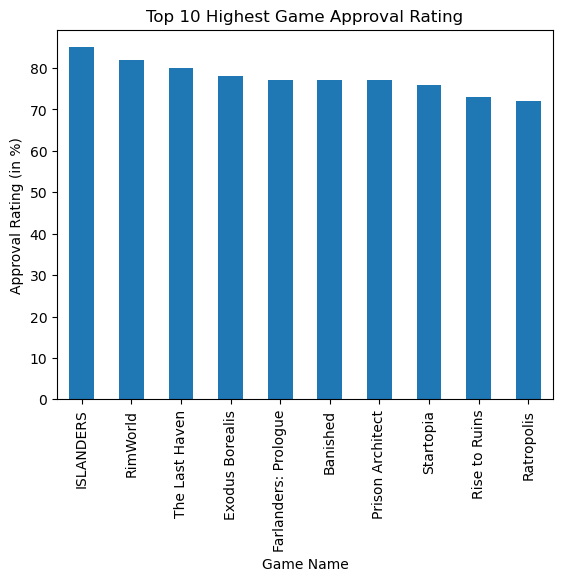

In [61]:
top10_positive.approval_rating.plot.bar(xlabel= 'Game Name', ylabel='Approval Rating (in %)',title="Top 10 Highest Game Approval Rating")

In [22]:
query_most_pos_indie='''
SELECT Name,
       COUNT([App ID]) AS rev_count,
       [Positive Reviews],
       [Negative Reviews],
       ([Positive Reviews]-[Negative Reviews])*100/COUNT([App ID]) AS approval_rating,
       Tags
FROM colonySim_games2022_reviews
WHERE [Positive Reviews] >50 AND Tags LIKE "%Indie%"
GROUP BY [App ID]
ORDER BY approval_rating DESC
LIMIT 10
'''

In [155]:
c.execute(query_most_pos_indie)
#c.fetchall()

In [49]:
top10_positive_indie=pd.read_sql_query(query_most_pos_indie,con=conn)
top10_positive_indie.set_index('Name',inplace=True)


<Axes: title={'center': 'Top 10 Highest Indie Approval Rating'}, xlabel='Game Name', ylabel='Approval Rating (in %)'>

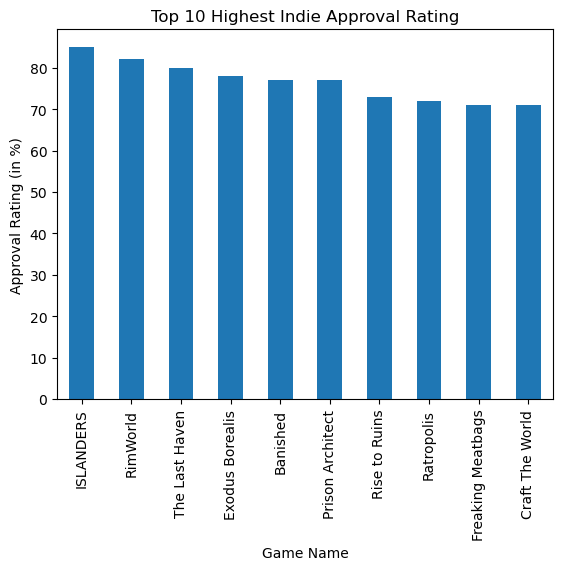

In [62]:
top10_positive_indie.approval_rating.plot.bar(xlabel= 'Game Name', ylabel='Approval Rating (in %)',title="Top 10 Highest Indie Approval Rating")

## here to adapt into a function 
unique_tags_colsim=[]
for game_tags in colonySims2022.Tags:
    tag_list= tag_cleaner(game_tags)
    for tag in tag_list:
        if tag not in unique_tags_colsim:
            unique_tags_colsim.append(tag)

In [24]:
def update_uniq_tag_list(tag_group):
    for game_tags in tag_group:
        tag_list= tag_cleaner(game_tags)
        for tag in tag_list:
            if tag in unique_tags_list:
                unique_tags_list[tag]+=1
            else:
                unique_tags_list[tag]=1
    return unique_tags_list

In [25]:
unique_tags_list={'Colony Sim':0}

In [26]:
unique_tags_list

{'Colony Sim': 0}

In [27]:
#Merging top lists to avoid repeats
top_col_sim_contenders= pd.merge(top10_reviewed,top10_reviewed_indie,how='outer')
top_col_sim_contenders= pd.merge(top_col_sim_contenders,top10_positive,how='outer')
top_col_sim_contenders= pd.merge(top_col_sim_contenders,top10_positive_indie,how='outer')
top_col_sim_contenders

,Name,rev_count,Positive Reviews,Negative Reviews,Tags,approval_rating
0,RimWorld,169176,142201,2550,"Colony Sim: 3375, Base-Building: 3296, Surviva...",82.0
1,Frostpunk,95303,76558,7020,"City Builder: 1520, Survival: 1488, Strategy: ...",NaN
2,Prison Architect,66689,57563,6155,"Simulation: 1861, Building: 1761, Sandbox: 170...",77.0
3,Cult of the Lamb,59055,29893,2387,"Character Customization: 570, Cute: 507, Actio...",NaN
4,SPORE,54402,43290,3731,"God Game: 1399, Open World: 1380, Exploration:...",NaN
5,Banished,40255,35024,3804,"City Builder: 3656, Colony Sim: 3383, Strategy...",77.0
6,Medieval Dynasty,32498,25348,2605,"Survival: 659, Building: 572, Open World: 556,...",NaN
7,WorldBox - God Simulator,27683,14152,872,"Early Access: 489, God Game: 444, Sandbox: 430...",NaN
8,Timberborn,20252,13968,834,"Early Access: 564, City Builder: 512, Colony S...",NaN
9,Going Medieval,15380,11462,1293,"Early Access: 401, City Builder: 364, Medieval...",NaN


In [28]:
update_uniq_tag_list(top_col_sim_contenders.Tags)


{'Colony Sim': 23,
 'Base-Building': 11,
 'Survival': 17,
 'Strategy': 19,
 'Management': 11,
 'Sandbox': 15,
 'Building': 19,
 'Simulation': 17,
 'City Builder': 17,
 'Singleplayer': 20,
 'Moddable': 2,
 'Open World': 11,
 'Procedural Generation': 6,
 'D': 13,
 'Sci-fi': 4,
 'Indie': 15,
 'Space': 4,
 'Tactical RPG': 1,
 'Western': 1,
 'Cartoony': 2,
 'Resource Management': 13,
 'Post-apocalyptic': 3,
 'Steampunk': 1,
 'Choices Matter': 2,
 'Atmospheric': 4,
 'Economy': 5,
 'Dark': 1,
 'RTS': 7,
 'Difficult': 4,
 'Great Soundtrack': 2,
 'Real-Time with Pause': 3,
 'Top-Down': 4,
 'Capitalism': 1,
 'Multiplayer': 7,
 'Funny': 4,
 'Replay Value': 3,
 'Casual': 4,
 'Character Customization': 1,
 'Cute': 4,
 'Action Roguelike': 1,
 'Rogue-lite': 2,
 'Dungeon Crawler': 1,
 'Dark Humor': 1,
 'Action': 4,
 'Faith': 1,
 'Adventure': 8,
 'Fantasy': 6,
 'Controller': 1,
 'Colorful': 3,
 'Third Person': 1,
 'God Game': 8,
 'Exploration': 4,
 'Science': 2,
 'Aliens': 2,
 'Family Friendly': 1,
 'C

In [161]:
unique_tags_list

{'Colony Sim': 23,
 'Base-Building': 11,
 'Survival': 17,
 'Strategy': 19,
 'Management': 11,
 'Sandbox': 15,
 'Building': 19,
 'Simulation': 17,
 'City Builder': 17,
 'Singleplayer': 20,
 'Moddable': 2,
 'Open World': 11,
 'Procedural Generation': 6,
 'D': 13,
 'Sci-fi': 4,
 'Indie': 15,
 'Space': 4,
 'Tactical RPG': 1,
 'Western': 1,
 'Cartoony': 2,
 'Resource Management': 13,
 'Post-apocalyptic': 3,
 'Steampunk': 1,
 'Choices Matter': 2,
 'Atmospheric': 4,
 'Economy': 5,
 'Dark': 1,
 'RTS': 7,
 'Difficult': 4,
 'Great Soundtrack': 2,
 'Real-Time with Pause': 3,
 'Top-Down': 4,
 'Capitalism': 1,
 'Multiplayer': 7,
 'Funny': 4,
 'Replay Value': 3,
 'Casual': 4,
 'Character Customization': 1,
 'Cute': 4,
 'Action Roguelike': 1,
 'Rogue-lite': 2,
 'Dungeon Crawler': 1,
 'Dark Humor': 1,
 'Action': 4,
 'Faith': 1,
 'Adventure': 8,
 'Fantasy': 6,
 'Controller': 1,
 'Colorful': 3,
 'Third Person': 1,
 'God Game': 8,
 'Exploration': 4,
 'Science': 2,
 'Aliens': 2,
 'Family Friendly': 1,
 'C

In [29]:
pd.set_option('display.max_rows',200)

In [30]:
tag_frequency= pd.DataFrame.from_dict(unique_tags_list,orient='index', columns=['tag_count'])
tag_frequency.sort_values('tag_count',ascending=False)

,tag_count
Colony Sim,23
Singleplayer,20
Strategy,19
Building,19
Survival,17
Simulation,17
City Builder,17
Sandbox,15
Indie,15
D,13


<Axes: >

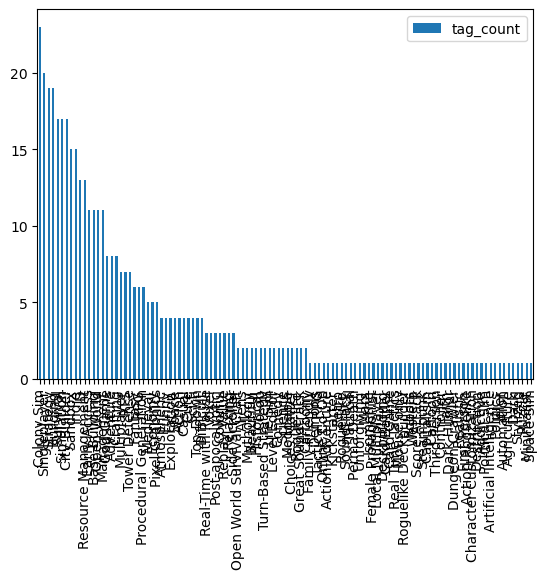

In [39]:
tag_frequency.sort_values('tag_count',ascending=False).plot.bar()

AttributeError: module 'pandas' has no attribute 'bar'

In [188]:
c.execute('''
SELECT [App ID], Name
FROM colonySim_games2022
WHERE LOWER(Tags) LIKE '%politic%'
''')
c.fetchall()

[(1206560, 'WorldBox - God Simulator'),
 (1281630, 'Anno 1404 - History Edition'),
 (1358930, 'Playing God'),
 (1360670, 'MiniMap Kingdom'),
 (1587540, 'Anvil Saga'),
 (1616540, 'Exodus H'),
 (1672830, 'LandCombat:Ren'),
 (1714430, "Time's Up in Tiny Town"),
 (1857340, 'Spy Network'),
 (1923670, 'Venture Towns'),
 (1994110, 'Fiefdom'),
 (2081770, 'Northern Kingdoms'),
 (39680, 'The Guild II Renaissance'),
 (450700, 'The Spatials: Galactology'),
 (693580, 'Goblins of Elderstone'),
 (841190, 'Honey, I Joined a Cult'),
 (858810, 'Dawn of Man'),
 (909320, 'Ruinarch')]